# **Preparación de los datos**


In [417]:
#Librerias que vamos a usar a lo largo del EDA
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from utils import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, cardi

# **Carga de la base de datos y visualización inicial**

In [418]:
#Llamamos al csv y creamos el df de perfil turistico
df_perfil_turistico = pd.read_csv("./data/Perfil_turístico.csv", sep=";", encoding="latin1")

In [419]:
#Observamos sus primeras columnas
df_perfil_turistico.head()

,Sexo,Edad,Nacionalidad,Viaja_solo,Viaja_pareja,Viaja_hijo,Viaja_amigos,Viaja_otros,Noches,Tipo_alojamiento,...,Canal_visitas_anteriores,Canal_familia,Canal_redes_sociales,Canal_otro,Horas_fuera_alojamiento,A_playa,A_gastronomia,A_ocio,A_senderismo,Año
0,6,59,Italia,No,Si,No,No,No,7,3,...,Si,No,No,No,10,Si,No,No,No,2022
1,6,67,Irlanda,No,No,No,No,Si,7,2,...,Si,No,No,No,10,Si,No,No,No,2022
2,6,39,Italia,No,No,No,No,Si,7,3,...,No,No,Si,No,15,No,No,Si,No,2022
3,1,67,Irlanda,No,Si,No,No,No,14,2,...,Si,No,No,No,2,Si,No,No,No,2022
4,1,38,Italia,No,Si,No,No,No,7,4,...,No,No,Si,No,5,No,No,Si,No,2022


# **Limpieza de los datos**

In [420]:
#Limpieza de variables categóticas
# Se sabe que en la variable sexo 1=Hombre y 6=Mujer por lo que vamos a hacer la transformacion
df_perfil_turistico["Sexo"] = df_perfil_turistico["Sexo"].replace({1: "Hombre", 6: "Mujer"})

In [421]:
#Nivel educativo
df_perfil_turistico["Nivel_educativo"] = df_perfil_turistico["Nivel_educativo"].replace({1:"Sin estudios", 2:"Estudios primarios", 3:"Estudios secundarios", 4:"Estudios superiores"})

In [422]:
#Situacion laboral
df_perfil_turistico["Situacion_laboral"] = df_perfil_turistico["Situacion_laboral"].replace({ 1:"Asalariado", 2:"Autonomo", 3:"Empresario_peque", 4:"Empresario_grande",
5:"Desempleado", 6:"Estudiante", 7:"Jubilado", 8:"Incapacitado", 9:"Militar", 10:"Dependients", 11:"Otros"})


In [423]:
#Ingresos
df_perfil_turistico["Ingresos"] = df_perfil_turistico["Ingresos"].replace({1:"Menos 25.000", 2:"25.000-49.999",3:"50.000-74.999", 4:"+75.000"})

In [424]:
#Tipo de alojamiento
df_perfil_turistico["Tipo_alojamiento"] = df_perfil_turistico["Tipo_alojamiento"].replace({1:"Hotel 1-2-3*", 2:"Hotel 4*",3:"Hotel 5*", 4:"Apartamento/Villa", 5:"Vivienda/airbnb", 6:"Alojamiento privado", 7:"Alojamiento rural"})

In [425]:
#Satisfacción
df_perfil_turistico["Satisfacción"] = df_perfil_turistico["Satisfacción"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [426]:
#Repetiría
df_perfil_turistico["Repetiria"] = df_perfil_turistico["Repetiria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [427]:
#Recomendación
df_perfil_turistico["Recomendaria"] = df_perfil_turistico["Recomendaria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})

In [428]:
#Calificacion
df_perfil_turistico["Calificacion"] = df_perfil_turistico["Calificacion"].replace({1:"Mucho peor de lo esperado", 2:"Peor de lo esperado",3:"A la altura de las expectativas", 4:"Mejor de lo esperado", 5:"Mucho mejor de lo esperado"})

In [429]:
#Creamos una columna con el tipo de aconmpañante
columnas_tipo_acompañante = ["Viaja_solo", "Viaja_pareja", "Viaja_hijo", "Viaja_amigos", "Viaja_otros"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Modo_viaje"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_acompañante if row[col] == "Si"), axis=1)


In [430]:
#Eliminamos la columna Tipo de viaje
df_perfil_turistico = df_perfil_turistico.drop(columns=["Viaja_pareja","Viaja_hijo","Viaja_otros","Viaja_solo","Viaja_amigos"])

In [431]:
#Creamos una columna con el tipo de canal
columnas_tipo_canal = ["Canal_visitas_anteriores", "Canal_familia", "Canal_redes_sociales", "Canal_otro"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Canal"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_canal if row[col] == "Si"), axis=1)


In [432]:
#Eliminamos la columna Tipo de canales
df_perfil_turistico = df_perfil_turistico.drop(columns=["Canal_visitas_anteriores", "Canal_familia", "Canal_redes_sociales", "Canal_otro"])

In [433]:
#Creamos una columna con actividades realizadas
columnas_actividad = ["A_playa","A_gastronomia","A_ocio","A_senderismo","A_otro_deporte"]

# Crear la columna "Resultado" solo basándose en esas columnas
df_perfil_turistico["Actividades"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_actividad if row[col] == "Si"), axis=1)

KeyError: 'A_otro_deporte'

In [370]:
#Eliminamos la columna Tipos de actividades
df_perfil_turistico = df_perfil_turistico.drop(columns=["A_playa","A_gastronomia","A_ocio","A_senderismo","A_otro_deporte"])

In [371]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     6404 non-null   object 
 1   Edad                     6404 non-null   int64  
 2   Nacionalidad             6404 non-null   object 
 3   Noches                   6404 non-null   int64  
 4   Tipo_alojamiento         6404 non-null   object 
 5   Coste_vuelos             6404 non-null   float64
 6   Coste_alojamiento        6404 non-null   float64
 7   Visitas_totales_Islas    6404 non-null   int64  
 8   Visitas_total_GC         6404 non-null   int64  
 9   Satisfacción             6404 non-null   object 
 10  Calificacion             6404 non-null   object 
 11  Repetiria                6404 non-null   object 
 12  Recomendaria             6404 non-null   object 
 13  Nivel_educativo          6404 non-null   object 
 14  Situacion_laboral       

In [372]:
# Convertir algunas columnas a float
df_perfil_turistico['Edad'] = df_perfil_turistico['Edad'].astype(float)
# Verificar el cambio
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     6404 non-null   object 
 1   Edad                     6404 non-null   float64
 2   Nacionalidad             6404 non-null   object 
 3   Noches                   6404 non-null   int64  
 4   Tipo_alojamiento         6404 non-null   object 
 5   Coste_vuelos             6404 non-null   float64
 6   Coste_alojamiento        6404 non-null   float64
 7   Visitas_totales_Islas    6404 non-null   int64  
 8   Visitas_total_GC         6404 non-null   int64  
 9   Satisfacción             6404 non-null   object 
 10  Calificacion             6404 non-null   object 
 11  Repetiria                6404 non-null   object 
 12  Recomendaria             6404 non-null   object 
 13  Nivel_educativo          6404 non-null   object 
 14  Situacion_laboral       

In [ ]:
#¿Valores duplicados?
df_perfil_turistico.duplicated(keep=False)
len(df_perfil_turistico[df_perfil_turistico.duplicated(keep = False)]) # keep = "first", keep = False

0

In [374]:
#¿Valores nulos?
df_perfil_turistico.isnull()
df_perfil_turistico.isnull().sum()

Sexo                       0
Edad                       0
Nacionalidad               0
Noches                     0
Tipo_alojamiento           0
Coste_vuelos               0
Coste_alojamiento          0
Visitas_totales_Islas      0
Visitas_total_GC           0
Satisfacción               0
Calificacion               0
Repetiria                  0
Recomendaria               0
Nivel_educativo            0
Situacion_laboral          0
Ingresos                   0
Personas_hogar             0
Cuatrimestre               0
Horas_fuera_alojamiento    0
Año                        0
Modo_viaje                 0
Canal                      0
Actividades                0
dtype: int64

In [375]:
#Vemos el total de columnas
df_perfil_turistico.columns

Index(['Sexo', 'Edad', 'Nacionalidad', 'Noches', 'Tipo_alojamiento',
       'Coste_vuelos', 'Coste_alojamiento', 'Visitas_totales_Islas',
       'Visitas_total_GC', 'Satisfacción', 'Calificacion', 'Repetiria',
       'Recomendaria', 'Nivel_educativo', 'Situacion_laboral', 'Ingresos',
       'Personas_hogar', 'Cuatrimestre', 'Horas_fuera_alojamiento', 'Año',
       'Modo_viaje', 'Canal', 'Actividades'],
      dtype='object')

In [376]:
df_perfil_turistico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     6404 non-null   object 
 1   Edad                     6404 non-null   float64
 2   Nacionalidad             6404 non-null   object 
 3   Noches                   6404 non-null   int64  
 4   Tipo_alojamiento         6404 non-null   object 
 5   Coste_vuelos             6404 non-null   float64
 6   Coste_alojamiento        6404 non-null   float64
 7   Visitas_totales_Islas    6404 non-null   int64  
 8   Visitas_total_GC         6404 non-null   int64  
 9   Satisfacción             6404 non-null   object 
 10  Calificacion             6404 non-null   object 
 11  Repetiria                6404 non-null   object 
 12  Recomendaria             6404 non-null   object 
 13  Nivel_educativo          6404 non-null   object 
 14  Situacion_laboral       

Ya tenemos los datos limpios y listos para porder empezar con su análisis.

Empecemos con la tipología de las variables definiendo su cardinalidad para su posterior clasificación.

In [ ]:
# Calculemos ahora su cardinalidad
cardinalidad = round((df_perfil_turistico.nunique() /len (df_perfil_turistico))*100,2)
cardinalidad


Sexo                        0.03
Edad                        1.09
Nacionalidad                0.22
Noches                      0.47
Tipo_alojamiento            0.11
Coste_vuelos               27.67
Coste_alojamiento          34.84
Visitas_totales_Islas       0.41
Visitas_total_GC            0.42
Satisfacción                0.16
Calificacion                0.08
Repetiria                   0.16
Recomendaria                0.16
Nivel_educativo             0.06
Situacion_laboral           0.17
Ingresos                    0.06
Personas_hogar              0.22
Cuatrimestre                0.06
Horas_fuera_alojamiento     0.39
Año                         0.02
Modo_viaje                  0.08
Canal                       0.06
Actividades                 0.12
dtype: float64

In [378]:
# Calculemos ahora su cardinalidad
def cardi(df_in,umbral_categoria, umbral_continua):
    df_cardi= df_cardi = pd.DataFrame({
    "Cardi": df_in.nunique(),
    "% Cardi": df_in.nunique() / len(df_in) * 100
})
    clasificacion= []
    for index, valor in df_cardi["Cardi"].items():
        if valor==2:
            clasificacion.append("Binaria")
        elif valor < umbral_categoria:
            clasificacion.append("Categorica")
        elif valor >= umbral_categoria:
            if df_cardi.loc[index, "% Cardi"] >= umbral_continua:
                clasificacion.append("Numerica Continua")
            else:
                clasificacion.append("Numerica Discreta")
    df_cardi["Clasificacion"]=clasificacion
    return df_cardi

In [379]:
cardi(df_perfil_turistico,12,65)

,Cardi,% Cardi,Clasificacion
Sexo,2,0.031230,Binaria
Edad,70,1.093067,Numerica Discreta
Nacionalidad,14,0.218613,Numerica Discreta
Noches,30,0.468457,Numerica Discreta
Tipo_alojamiento,7,0.109307,Categorica
Coste_vuelos,1772,27.670206,Numerica Discreta
Coste_alojamiento,2231,34.837601,Numerica Discreta
Visitas_totales_Islas,26,0.405996,Numerica Discreta
Visitas_total_GC,27,0.421611,Numerica Discreta
Satisfacción,10,0.156152,Categorica


# **Análisis**

Una vez determinada la cardinalidad, podemos comprender mejor las variables y definirlas en la siguiente tabla. Esta tabla nos servirá como guía para identificar cada variable y aplicar el análisis adecuado a cada una de ellas.

|Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Sexo| Sexo del entrevistado: Hombre o mujer|Binaria|1|Explica análisis demográfico|
|Edad| Edad del encuestado|Numérica Discreta|1|Explica análisis demográfico|
|Nacionalidad|Nacionalidad del turista|Categórica|1|Explica análisis demográfico|
|Noches|Número de noches que pernoctó en la isla|Númerica Discreta|1|Define el comportamiento del gasto|
|Tipo_alojamiento| Tipo de alojamiento que se hospedó|Categórica|1|Define el comportamiento del gasto|
|Coste_vuelos|Coste en euros del billete de avión|Numérica Discreta|1|Define el comportamiento del gasto|
|Coste_alojamiento|Coste en euros de las noches alojadas|Numérica Discreta|1|Define el comportamiento del gasto|
|Visitas_totales_Islas| Número de veces que ha visitados las Islas Canarias|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Visitas_total_GC| Número de veces que ha estado en Gran Canaria|Numérica Discreta|2|Nos aporta información sobre el comportamiento del turista|
|Satisfaccióm| Satisfacción del 1-10 de su estancia en GC|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Calificacion| Calificación del 1-10 de su viaje|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Repetiria| Del 1-10 el valor de repetición|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Recomendaria| Del 1-10 el valor de recomendación|Categórica|2|Nos aporta información sobre el comportamiento del turista|
|Nivel_educativo| Nivel educativo|Categórica|1|Explica análisis demográfico|
|Situacion_laboral| Situación laboral|Categórica|1|Explica análisis demográfico|
|Ingresos| Ingresos por tramos, del turista|Categórica|1|Explica análisis demográfico|
|Personas_hogar| Número de personas del hogar |Numérica Discreta|1|Explica análisis demográfico|
|Cuatrimestre| Cuatrimestre de estudio|Categórica|1|Temporadas del estudio|
|Horas_fuera_alojamiento| Horas fuera del alojamiento|Numérica discreta|3|Comportamiento durante la estancia|
|Modo viaje| Tipo de acompañante|Categórica|1|Define el comportamiento del gasto|
|Canal| Tipo de canal de destino|Categórica|3|Comportamiento previa a la estancia|
|Actividades| Actividades realizadas en el destino|Categórica|2|Comportamiento durante la estancia|

# **Análisis Univariante**

# *Variables Categóricas*

Análisis univariante de las variables categóricas

In [380]:
#Variables categóricas 
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Satisfacción","Calificacion","Repetiria","Recomendaria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje","Canal","Actividades"]

In [ ]:
#Perfil del turista
df_perfil_turistico[variables_categoricas].mode()

,Sexo,Nacionalidad,Tipo_alojamiento,Satisfacción,Calificacion,Repetiria,Recomendaria,Nivel_educativo,Situacion_laboral,Ingresos,Modo_viaje,Canal,Actividades
0,Mujer,España,Hotel 4*,(10),A la altura de las expectativas,(10),(10),Estudios superiores,Asalariado,25.000-49.999,Viaja_pareja,Canal_visitas_anteriores,A_playa


La moda revela que el perfil predominante del turista es el de una mujer procedente de la península. Este turista se aloja en hoteles de cuatro estrellas, disfruta de su estancia, alcanzando sus expectativas, y, sin duda, volvería y recomendaría el destino. Su perfil suele incluir estudios superiores y un nivel de ingresos de entre 25.000 y 50.000 euros. Generalmente, viaja en pareja, habiendo visitado las islas previamente, y su actividad principal es disfrutar de la playa.

***Análisis de frecuencias absolutas y relativas***

In [382]:
#Estudio de las frecuencias
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Nacionalidad"].value_counts())
#Valor relativo
print("Valor relativa:",(df_perfil_turistico["Nacionalidad"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Nacionalidad
España          1239
Alemania        1102
Reino Unido     1002
Otros            539
Suecia           523
Noruega          419
Países Bajos     361
Dinamarca        222
Finlandia        210
Irlanda          205
Francia          180
Belgica          179
Italia           140
Suiza             83
Name: count, dtype: int64
Valor relativa: Nacionalidad
España          19.347283
Alemania        17.207995
Reino Unido     15.646471
Otros            8.416615
Suecia           8.166771
Noruega          6.542786
Países Bajos     5.637102
Dinamarca        3.466583
Finlandia        3.279200
Irlanda          3.201124
Francia          2.810743
Belgica          2.795128
Italia           2.186134
Suiza            1.296065
Name: count, dtype: float64


In [383]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Tipo_alojamiento"].value_counts())
#Valor relativo
print("Valor relativa:",(df_perfil_turistico["Tipo_alojamiento"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Tipo_alojamiento
Hotel 4*               2368
Apartamento/Villa      1748
Hotel 5*                959
Hotel 1-2-3*            676
Vivienda/airbnb         378
Alojamiento privado     260
Alojamiento rural        15
Name: count, dtype: int64
Valor relativa: Tipo_alojamiento
Hotel 4*               36.976889
Apartamento/Villa      27.295440
Hotel 5*               14.975016
Hotel 1-2-3*           10.555903
Vivienda/airbnb         5.902561
Alojamiento privado     4.059963
Alojamiento rural       0.234229
Name: count, dtype: float64


In [384]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Satisfacción"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Satisfacción"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Satisfacción
(10)    2358
(9)     1738
(8)     1596
(7)      498
(6)      107
(5)       68
(3)       16
(4)       14
(2)        7
(1)        2
Name: count, dtype: int64
Valor relativo: Satisfacción
(10)    36.820737
(9)     27.139288
(8)     24.921924
(7)      7.776390
(6)      1.670831
(5)      1.061836
(3)      0.249844
(4)      0.218613
(2)      0.109307
(1)      0.031230
Name: count, dtype: float64


In [385]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Calificacion"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Calificacion"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Calificacion
A la altura de las expectativas    3783
Mejor de lo esperado               1702
Mucho mejor de lo esperado          769
Peor de lo esperado                 120
Mucho peor de lo esperado            30
Name: count, dtype: int64
Valor relativo: Calificacion
A la altura de las expectativas    59.072455
Mejor de lo esperado               26.577139
Mucho mejor de lo esperado         12.008120
Peor de lo esperado                 1.873829
Mucho peor de lo esperado           0.468457
Name: count, dtype: float64


In [386]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Repetiria"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Repetiria"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Repetiria
(10)    3658
(8)      945
(9)      944
(7)      412
(5)      187
(6)      168
(2)       32
(4)       26
(3)       23
(1)        9
Name: count, dtype: int64
Valor relativo: Repetiria
(10)    57.120550
(8)     14.756402
(9)     14.740787
(7)      6.433479
(5)      2.920050
(6)      2.623360
(2)      0.499688
(4)      0.405996
(3)      0.359151
(1)      0.140537
Name: count, dtype: float64


In [387]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Recomendaria"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Recomendaria"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Recomendaria
(10)    3769
(9)     1020
(8)      954
(7)      377
(6)      118
(5)      116
(3)       17
(2)       15
(4)       14
(1)        4
Name: count, dtype: int64
Valor relativo: Recomendaria
(10)    58.853841
(9)     15.927545
(8)     14.896939
(7)      5.886946
(6)      1.842598
(5)      1.811368
(3)      0.265459
(2)      0.234229
(4)      0.218613
(1)      0.062461
Name: count, dtype: float64


In [388]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Nivel_educativo"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Nivel_educativo"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Nivel_educativo
Estudios superiores     4509
Estudios secundarios    1564
Estudios primarios       181
Sin estudios             150
Name: count, dtype: int64
Valor relativo: Nivel_educativo
Estudios superiores     70.409119
Estudios secundarios    24.422236
Estudios primarios       2.826359
Sin estudios             2.342286
Name: count, dtype: float64


In [389]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Situacion_laboral"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Situacion_laboral"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Situacion_laboral
Asalariado           3783
Jubilado              963
Autonomo              702
Empresario_grande     357
Empresario_peque      264
Estudiante            180
Desempleado            60
Otros                  36
Dependients            30
Incapacitado           25
Militar                 4
Name: count, dtype: int64
Valor relativo: Situacion_laboral
Asalariado           59.072455
Jubilado             15.037477
Autonomo             10.961899
Empresario_grande     5.574641
Empresario_peque      4.122423
Estudiante            2.810743
Desempleado           0.936914
Otros                 0.562149
Dependients           0.468457
Incapacitado          0.390381
Militar               0.062461
Name: count, dtype: float64


In [390]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Ingresos"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Ingresos"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Ingresos
25.000-49.999    2130
+75.000          1765
50.000-74.999    1748
Menos 25.000      761
Name: count, dtype: int64
Valor relativo: Ingresos
25.000-49.999    33.260462
+75.000          27.560899
50.000-74.999    27.295440
Menos 25.000     11.883198
Name: count, dtype: float64


In [391]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Sexo"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Sexo"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Sexo
Mujer     3492
Hombre    2912
Name: count, dtype: int64
Valor relativo: Sexo
Mujer     54.52842
Hombre    45.47158
Name: count, dtype: float64


In [392]:
#Valor absoluto
print("Valor absoluto:",df_perfil_turistico["Modo_viaje"].value_counts())
#Valor relativo
print("Valor relativo:",(df_perfil_turistico["Modo_viaje"].value_counts()/len(df_perfil_turistico))*100)

Valor absoluto: Modo_viaje
Viaja_pareja    3118
Viaja_hijo      1516
Viaja_amigos     640
Viaja_otros      576
Viaja_solo       554
Name: count, dtype: int64
Valor relativo: Modo_viaje
Viaja_pareja    48.688320
Viaja_hijo      23.672705
Viaja_amigos     9.993754
Viaja_otros      8.994379
Viaja_solo       8.650843
Name: count, dtype: float64


# **Gráficos variables categóricas**

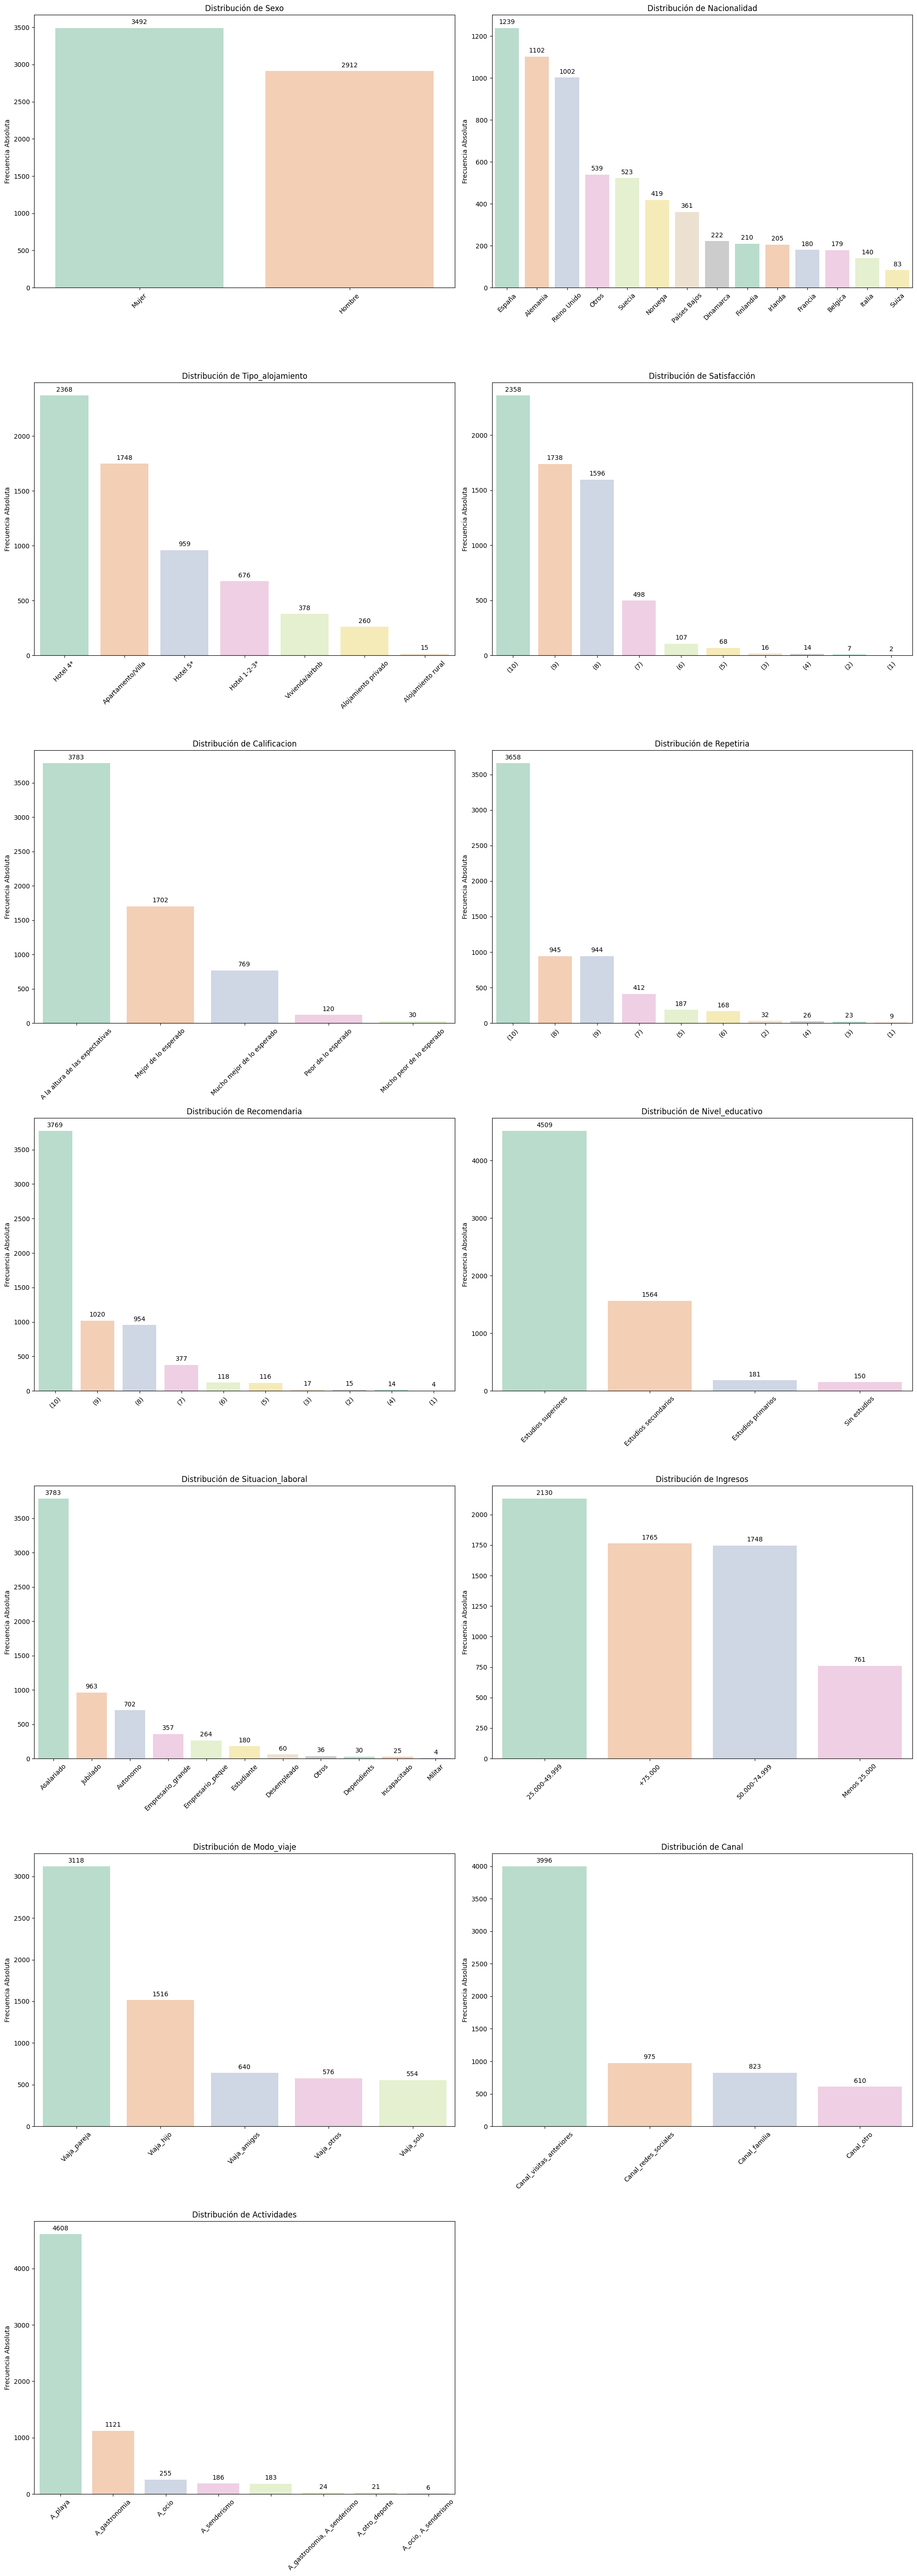

In [393]:
pinta_distribucion_categoricas(df_perfil_turistico,variables_categoricas,relativa=False,mostrar_valores=True)

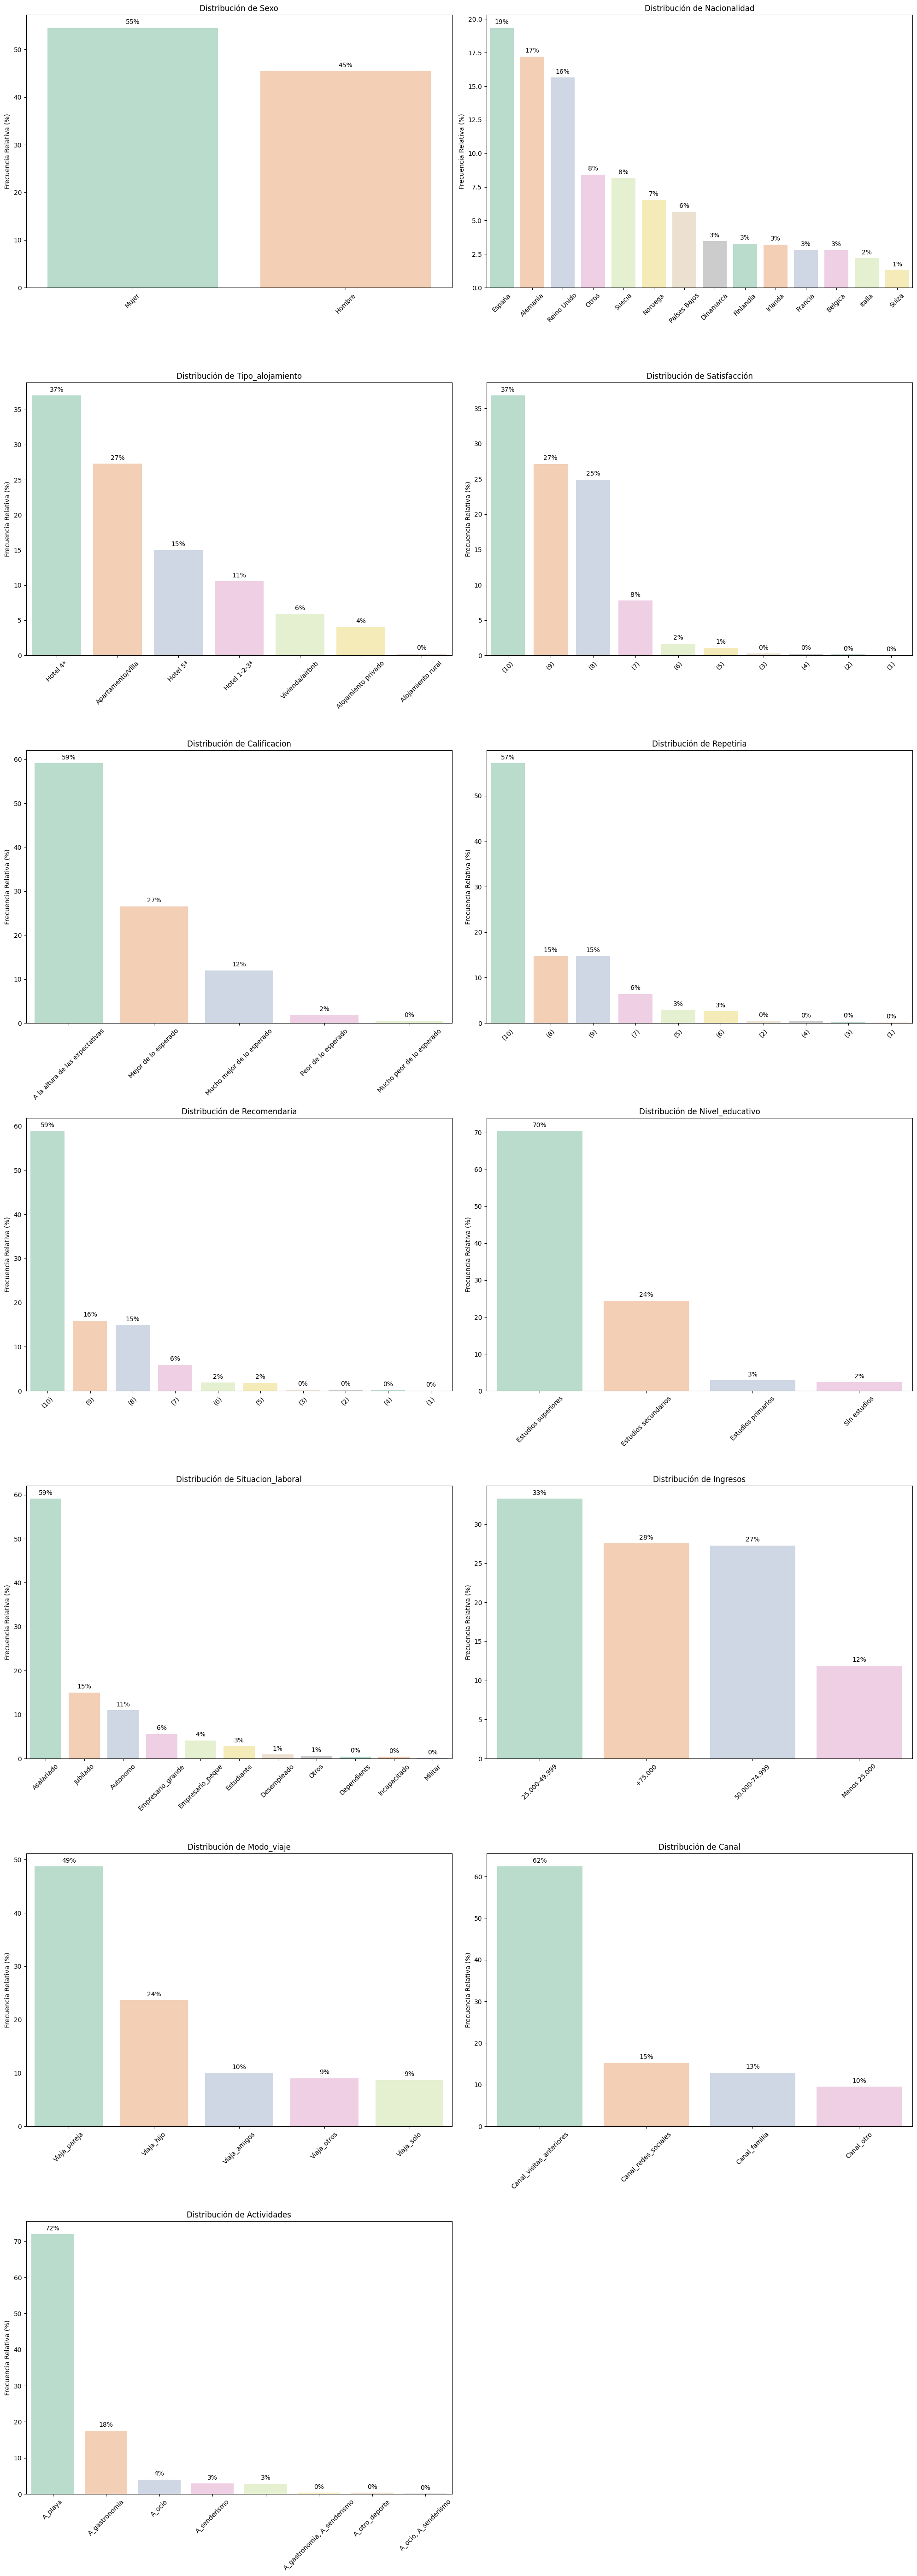

In [394]:
pinta_distribucion_categoricas(df_perfil_turistico,variables_categoricas,relativa=True,mostrar_valores=True)

# **Resumen analisis univariante de las variables categóricas**

>En términos relativos, el 55% de los turistas son mujeres, el 19% proviene de España, el 17% de Alemania y el 16% del Reino Unido. En cuanto al alojamiento, el 37% se hospeda en hoteles de 4 estrellas y el 27% en apartamentos o villas.

>Satisfacción y repetición: El 37% de los turistas otorgan una calificación de 10 a su satisfacción con la isla, mientras que el 57% afirmaron que repetirían el destino. Además, el 59% considera que su experiencia estuvo a la altura de sus expectativas, lo que lleva al mismo porcentaje (59%) a recomendar el destino.

>Nivel educativo y situación laboral: La distribución educativa muestra que el 70% tiene estudios superiores y el 24% estudios secundarios. En cuanto a su situación laboral, el 59% son asalariados y el 15% están jubilados. Los ingresos anuales de los turistas se distribuyen principalmente entre 25k y 49k (33%), mientras que el 28% gana más de 75k anuales.

>Modo de viaje: El 49% de los turistas viaja en pareja, y de ellos, el 24% lo hace con sus hijos. El canal principal de acceso a Gran Canaria es a través de visitas anteriores, seguido por las redes sociales, que influyen en un 15% de los casos.

# **Variables numéricas**

In [395]:
#Variables categóricas 
variables_categoricas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]

In [396]:
df_perfil_turistico.describe()

,Edad,Noches,Coste_vuelos,Coste_alojamiento,Visitas_totales_Islas,Visitas_total_GC,Personas_hogar,Horas_fuera_alojamiento,Año
count,6404.000000,6404.000000,6404.000000,6404.000000,6404.000000,6404.000000,6404.000000,6404.000000,6404.0
mean,48.565584,8.595878,354.147511,236.187376,9.865865,6.302467,2.494379,7.306215,2022.0
std,14.374487,4.200469,311.469263,324.945463,17.988838,14.760999,1.234797,4.139390,0.0
min,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2022.0
25%,38.000000,7.000000,2.099000,1.559750,2.000000,1.000000,2.000000,4.000000,2022.0
50%,49.000000,7.000000,333.000000,2.892000,4.000000,2.000000,2.000000,7.000000,2022.0
75%,59.000000,10.000000,600.000000,500.000000,9.000000,5.000000,3.000000,10.000000,2022.0
max,85.000000,30.000000,999.000000,999.000000,88.000000,88.000000,23.000000,24.000000,2022.0


Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 9 noches.

Costes y visitas: El coste medio de los vuelos es de 354€, mientras que el gasto en alojamiento asciende a 236€. En promedio, los turistas han visitado las Islas Canarias unas 10 veces y, en particular, Gran Canaria en 6 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 personas, y pasan un promedio de 7 horas al día fuera del alojamiento.



In [397]:
df_perfil_turistico.describe().loc["50%"]

Edad                         49.000
Noches                        7.000
Coste_vuelos                333.000
Coste_alojamiento             2.892
Visitas_totales_Islas         4.000
Visitas_total_GC              2.000
Personas_hogar                2.000
Horas_fuera_alojamiento       7.000
Año                        2022.000
Name: 50%, dtype: float64

In [398]:
#Agrupar por 'Cuatrimestre' y calcular estadísticas descriptivas
grouped_by_quarter = df_perfil_turistico.groupby("Cuatrimestre").agg({
    'Edad': ['mean', 'sum'],
    'Noches': ['mean', 'sum'],
    'Coste_vuelos': ['mean', 'sum'],
    'Coste_alojamiento': ['mean', 'sum'],
    'Visitas_totales_Islas': ['mean', 'sum'],
    'Visitas_total_GC': ['mean', 'sum'],      
    'Personas_hogar': ['mean', 'sum'],  
    'Horas_fuera_alojamiento': ['mean', 'sum']  
}).reset_index()

# Ver el resultado
print(grouped_by_quarter)

  Cuatrimestre       Edad             Noches        Coste_vuelos              \
                     mean      sum      mean    sum         mean         sum   
0           Q1  50.556875  80891.0  8.791250  14066   364.244916  582791.866   
1           Q2  49.182133  71019.0  8.171745  11800   349.290577  504375.593   
2           Q3  43.331737  63351.0  8.964432  13106   354.088972  517678.077   
3           Q4  50.449420  95753.0  8.469968  16076   349.375724  663115.124   

  Coste_alojamiento             Visitas_totales_Islas        Visitas_total_GC  \
               mean         sum                  mean    sum             mean   
0        236.679897  378687.835             10.168125  16269         6.574375   
1        281.665353  406724.770              9.860111  14238         6.300554   
2        216.155032  316018.657              8.796854  12861         5.432969   
3        216.603106  411112.696             10.438883  19813         6.744468   

         Personas_hogar       Ho

Se observa que el comportamiento por cuatrimestre es practicamente el mismo

In [ ]:
plot_grouped_histograms(df_perfil_turistico, columnas_actividad, 8, 8, bins = "auto")

KeyError: "None of [Index(['A_playa', 'A_gastronomia', 'A_ocio', 'A_senderismo', 'A_otro_deporte'], dtype='object')] are in the [columns]"

(2,)


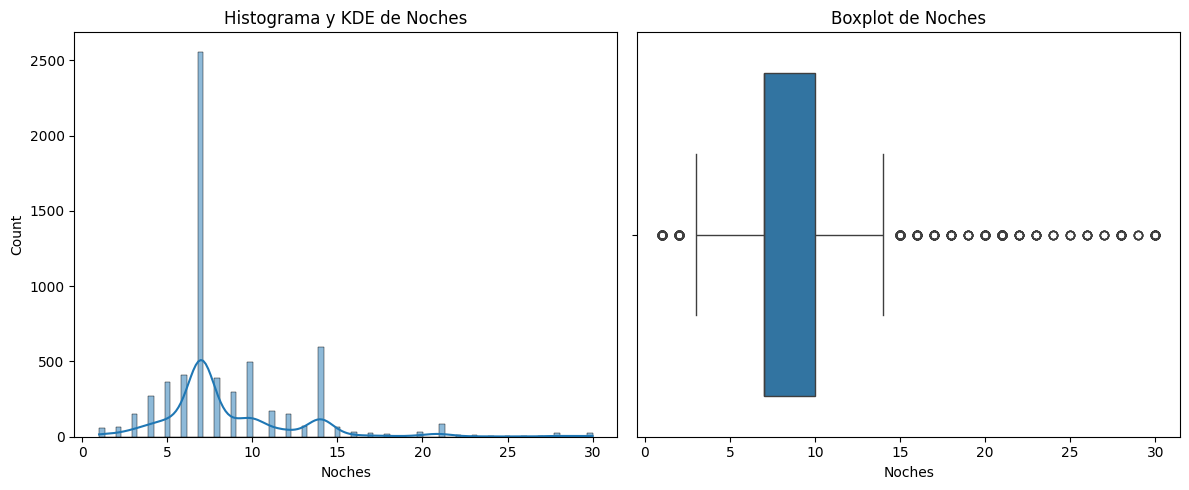

In [102]:
plot_combined_graphs(df_perfil_turistico,["Noches"])

(2,)


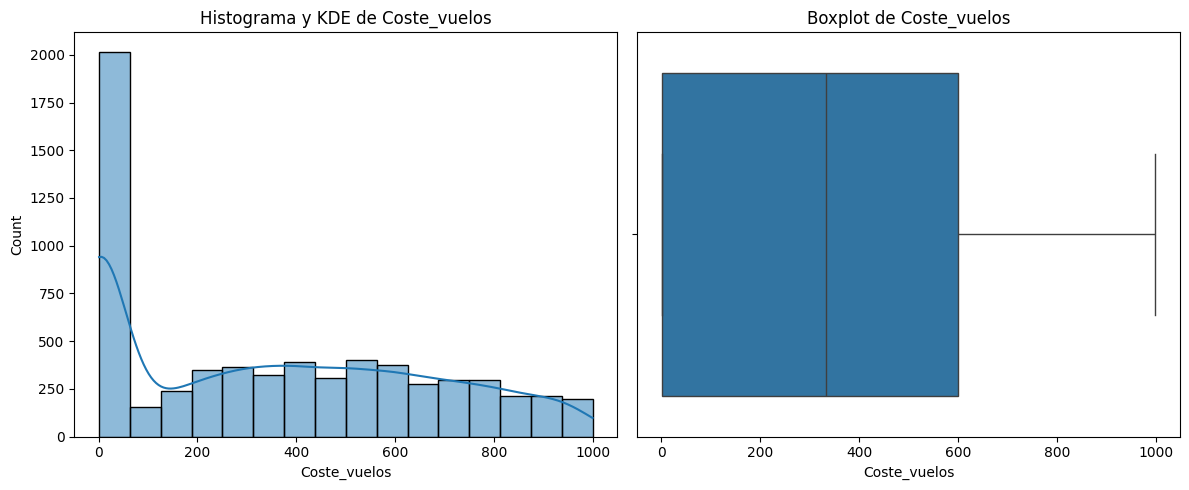

In [103]:
plot_combined_graphs(df_perfil_turistico,["Coste_vuelos"])

(2,)


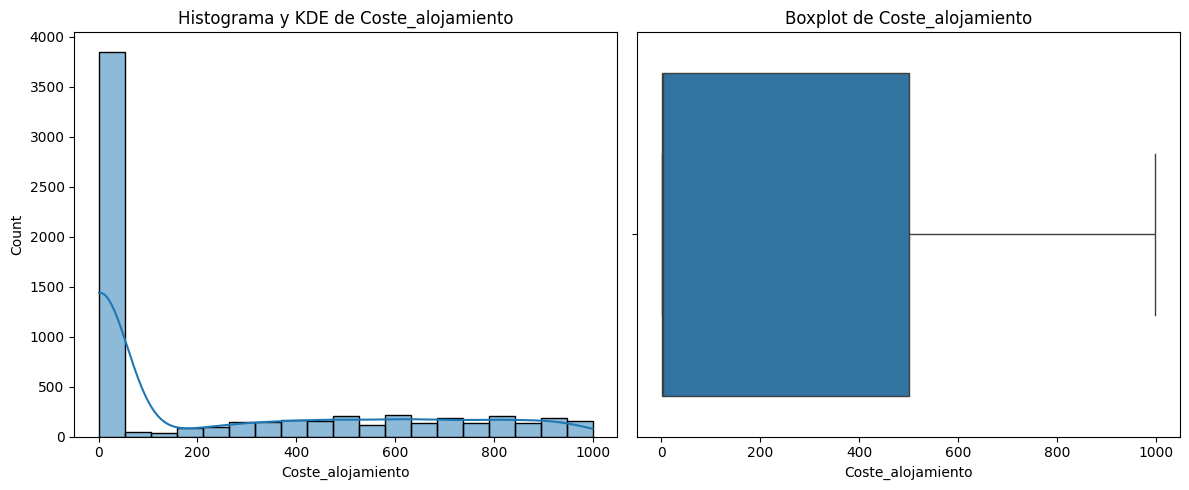

In [104]:
plot_combined_graphs(df_perfil_turistico,["Coste_alojamiento"])

(2,)


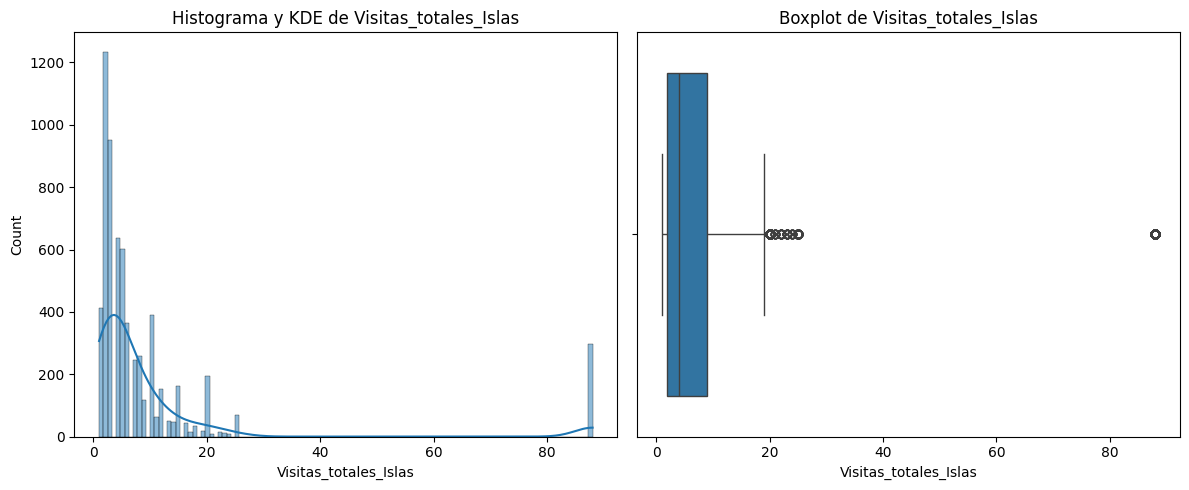

In [105]:
plot_combined_graphs(df_perfil_turistico,["Visitas_totales_Islas"])

(2,)


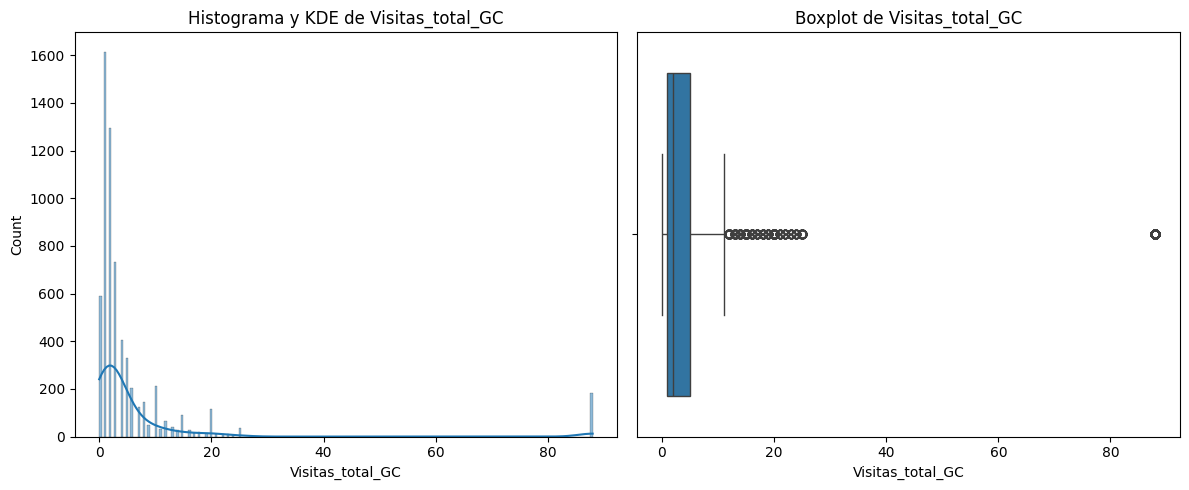

In [106]:
plot_combined_graphs(df_perfil_turistico,["Visitas_total_GC"])

(2,)


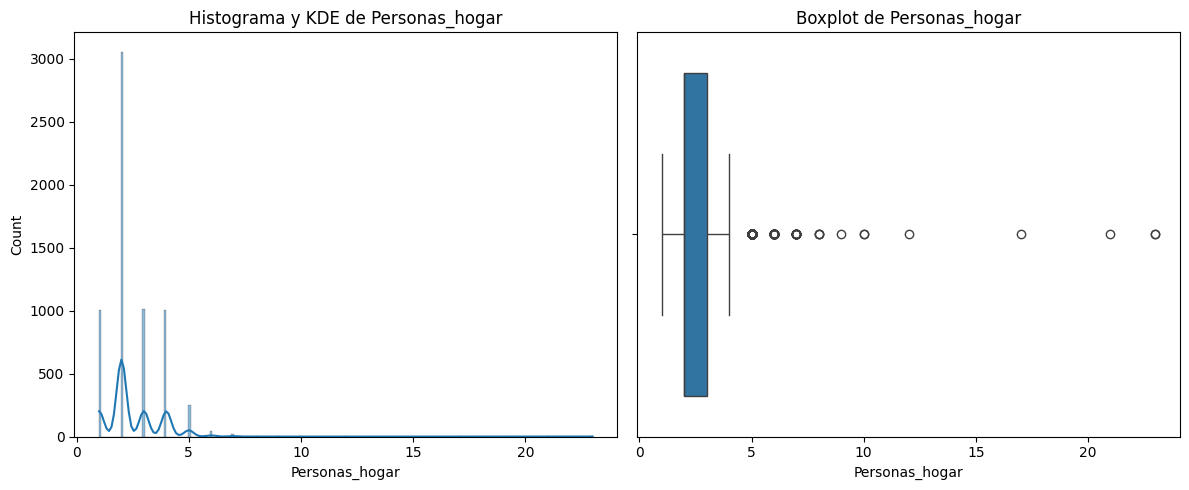

In [107]:
plot_combined_graphs(df_perfil_turistico,["Personas_hogar"])

In [108]:
#Rangos
df_perfil_turistico.describe().loc["max"] - df_perfil_turistico.describe().loc["min"]

Edad                        69.0
Noches                      29.0
Coste_vuelos               998.0
Coste_alojamiento          998.0
Visitas_totales_Islas       87.0
Visitas_total_GC            88.0
Personas_hogar              22.0
Horas_fuera_alojamiento     24.0
Año                          0.0
dtype: float64

In [109]:
#Medidas de disperción

***Análisis de Correlaciones***

Crear una matriz de correlación para estudiar relaciones entre variables como Coste_vuelos, Coste_alojamiento, Noches, y Satisfacción.
Identificar si hay relaciones entre el gasto y la satisfacción o la probabilidad de recomendar/repetir.
Relaciones categóricas-numéricas:
Comparar distribuciones de gasto (Coste_vuelos y Coste_alojamiento) según Nacionalidad, Sexo, o Tipo_alojamiento.


4. Estacionalidad y Tendencias
Por Cuatrimestre:
Agrupar datos por Cuatrimestre y analizar variables como:
Coste_vuelos y Coste_alojamiento: Variaciones a lo largo del año.
Noches: Cambios en la duración promedio de la estancia.
Satisfacción y Repetiria: Evaluar si las temporadas influencian estas métricas.
Crear gráficos de línea o barras para visualizar tendencias por cuatrimestre y año.


**Analisis**

1. Análisis Demográfico

Edad y Sexo:
¿Cómo cambia la distribución por género y grupo de edad en cada cuatrimestre?

Identificar tendencias (e.g., ¿turistas más jóvenes en verano?).

Nacionalidad:
Analizar principales países de origen en cada cuatrimestre.
Detectar cambios estacionales en la procedencia (e.g., más turistas del norte de Europa en invierno).

In [110]:
# 1. Distribución por Sexo y Cuatrimestre
sexo_cuatrimestre = df.groupby(['Cuatrimestre', 'Sexo']).size().reset_index(name='Cantidad')
plt.figure(figsize=(10, 6))
sns.barplot(data=sexo_cuatrimestre, x='Cuatrimestre', y='Cantidad', hue='Sexo', palette='pastel')
plt.title('Distribución por Sexo y Cuatrimestre (2023)', fontsize=14)
plt.xlabel('Cuatrimestre')
plt.ylabel('Cantidad de Turistas')
plt.legend(title='Sexo')
plt.show()

NameError: name 'df' is not defined

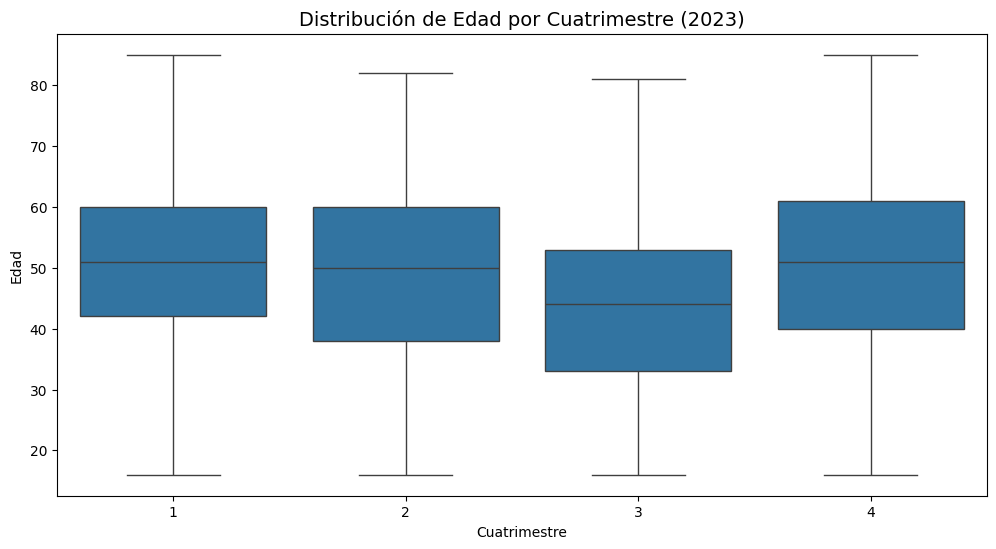

In [ ]:
# 2. Distribución por Edad y Cuatrimestre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cuatrimestre', y='Edad')
plt.title('Distribución de Edad por Cuatrimestre (2023)', fontsize=14)
plt.xlabel('Cuatrimestre')
plt.ylabel('Edad')
plt.show()

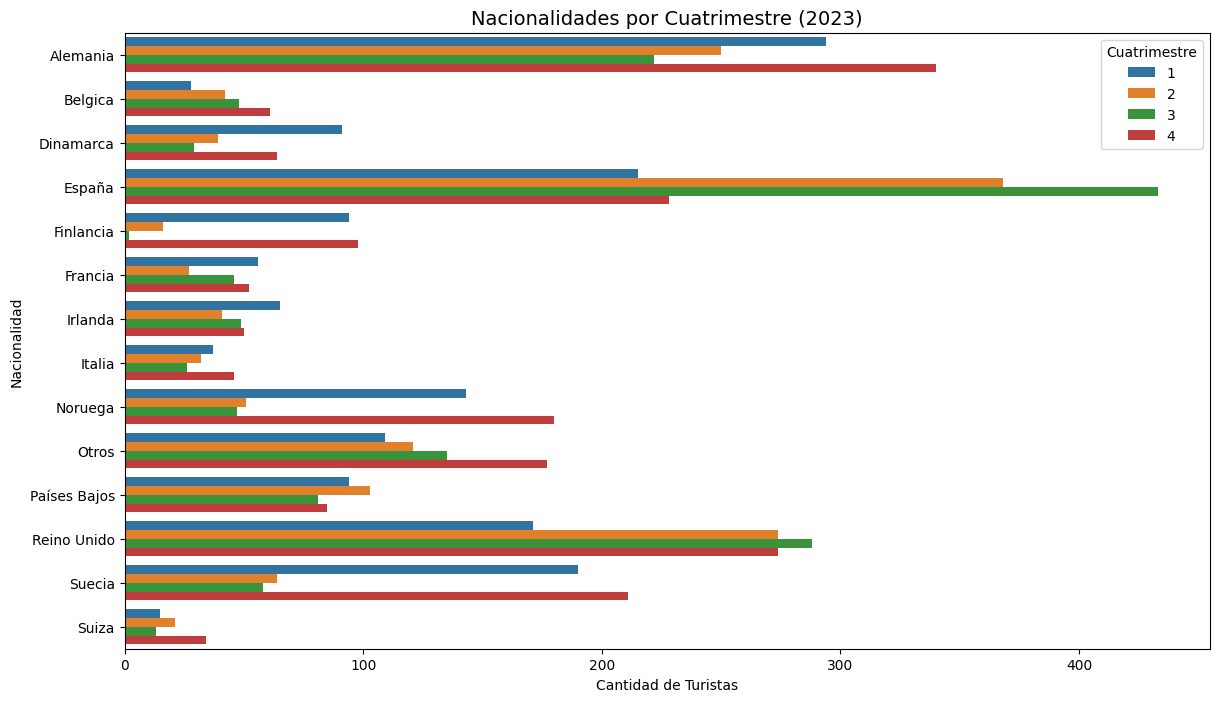

In [ ]:
# 3. Nacionalidad por Cuatrimestre
nacionalidad_cuatrimestre = df.groupby(['Cuatrimestre', 'Nacionalidad']).size().reset_index(name='Cantidad')

plt.figure(figsize=(14, 8))
sns.barplot(data=nacionalidad_cuatrimestre, x='Cantidad', y='Nacionalidad', hue='Cuatrimestre', dodge=True, palette='tab10')
plt.title('Nacionalidades por Cuatrimestre (2023)', fontsize=14)
plt.xlabel('Cantidad de Turistas')
plt.ylabel('Nacionalidad')
plt.legend(title='Cuatrimestre')
plt.show()

2. Análisis de Motivos y Composición del Viaje
Motivos del viaje:
Analizar patrones en los motivos (e.g., vacaciones, negocios, eventos culturales) según el cuatrimestre.
Segmentar por edad o situación laboral para identificar subgrupos clave.
Composición del grupo:
¿Cuántos turistas viajan en pareja, solos o en grupo? ¿Cómo varían estas proporciones por temporada?
Identificar si ciertos perfiles son más frecuentes en periodos específicos.

array([[<Axes: title={'center': 'Cuatrimestre'}>]], dtype=object)

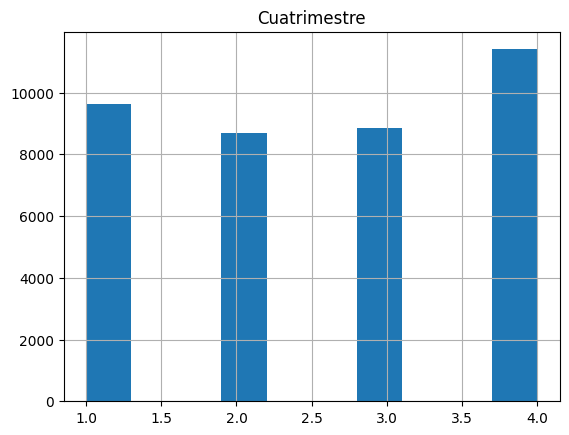

In [ ]:
# 1. Composición del Grupo de Viaje por Cuatrimestre
# Crear un DataFrame con las columnas de composición de viaje
viaje_grupo_cols = [
    'Viaja_solo', 'Viaja_pareja', 'Viaja_hijo',
    'Viaja_otros_familiares', 'Viaja_amigos', 'Viaja_grupo_organizado'
]
df_viaje_composicion = df.melt(
    id_vars=['Cuatrimestre'],
    value_vars=viaje_grupo_cols,
    var_name='Tipo_viaje',
    value_name='Cantidad'
)

df_viaje_composicion.hist()


3. Estacionalidad y Duración de la Estancia
Duración (Noches):
Promedio y mediana de noches por cuatrimestre.
Detectar periodos con estancias más largas (p. ej., vacaciones de verano).
Tipo de alojamiento:
Análisis del tipo de alojamiento preferido por cuatrimestre (hoteles, apartamentos, casas rurales).
Examinar cómo se relaciona el coste del alojamiento con el cuatrimestre.

4. Análisis Económico
Gasto:
Analizar el coste de vuelos y alojamiento por cuatrimestre.
Relacionar gastos con nacionalidad o ingresos del turista.
Ingresos del hogar:
Segmentar por nivel socioeconómico para identificar patrones en el gasto.
Detectar si turistas de mayor poder adquisitivo visitan en periodos específicos.

5. Satisfacción y Fidelidad
Satisfacción y calificación:
Evaluar la satisfacción media por cuatrimestre.
Identificar qué factores están asociados con mayores calificaciones (e.g., tipo de alojamiento, duración).
Fidelización:
Análisis de los turistas que repetirían y recomendarían Gran Canaria.
Comparar entre cuatrimestres para identificar el más exitoso en generar fidelidad.

6. Educación y Situación Laboral
Nivel educativo:
Analizar la distribución del nivel educativo entre turistas en cada cuatrimestre.
Identificar si turistas con niveles educativos específicos predominan en ciertas temporadas.
Situación laboral:
Detectar patrones entre turistas activos, jubilados o estudiantes.

7. Análisis de Visitas Recurrentes
Visitas previas a Gran Canaria o Islas Canarias:
Proporción de turistas que ya han visitado previamente.
Identificar fidelización de turistas frecuentes y sus características (gasto, satisfacción, etc.).


8. Comparaciones por Cuatrimestre
Crear gráficos para identificar patrones estacionales claros:
Barras apiladas para composición del grupo y tipo de alojamiento.
Boxplots para analizar la variabilidad del gasto por cuatrimestre.
Mapas de calor para mostrar procedencia geográfica y estacionalidad.

4. Estacionalidad y Tendencias
Por Cuatrimestre:
Agrupar datos por Cuatrimestre y analizar variables como:
Coste_vuelos y Coste_alojamiento: Variaciones a lo largo del año.
Noches: Cambios en la duración promedio de la estancia.
Satisfacción y Repetiria: Evaluar si las temporadas influencian estas métricas.
Crear gráficos de línea o barras para visualizar tendencias por cuatrimestre y año.

5. Segmentación de Perfiles
Segmentos según tipo de viaje:
Crear nuevas variables agregadas para analizar combinaciones de variables como:
Viaja_solo, Viaja_pareja, Viaja_hijo, etc.
Identificar el perfil predominante en cada segmento (por ejemplo, "viaja en pareja" con más noches o mayor gasto en vuelos).
Relación con Nacionalidad:
Evaluar cómo varían las preferencias de viaje (Tipo_alojamiento, Noches) según las nacionalidades.

6. Análisis de Satisfacción y Recomendación
Factores asociados a satisfacción:
Comparar la variable Satisfacción con otras como:
Coste_alojamiento y Coste_vuelos: ¿Afecta el gasto a la satisfacción?
Tipo_alojamiento: ¿Cuál tipo genera mayor satisfacción?
Edad y Nivel_educativo: ¿Hay diferencias según perfil demográfico?
Relación entre Satisfacción y Repetición/Recomendación:
Investigar si altos niveles de Satisfacción están correlacionados con Repetiria y Recomendaria.

7. Ingresos y Composición del Hogar
Relación entre ingresos y comportamiento:
Comparar Ingresos con variables como Coste_vuelos, Coste_alojamiento y Noches.
Analizar si los ingresos afectan la elección de Tipo_alojamiento o la satisfacción del viaje.
Composición del hogar:
Evaluar si el tamaño del hogar (Personas_hogar) influye en la decisión de viaje en familia o grupo.
